# <b>Task 3:</b> Correlation & Regression
<hr>

0     2016-01-03
1     2016-01-07
2     2016-01-07
3     2016-01-10
4     2016-01-10
         ...    
945   2019-12-15
946   2019-12-26
947   2019-12-27
948   2019-12-28
949   2019-12-29
Name: Date of Sale, Length: 950, dtype: datetime64[ns]
   Date of Sale     Price    Location  Year Built         Size  \
0    2016-01-03  638740.0  Brookville        2011  1,849 sq ft   
1    2016-01-07  546330.0  Brookville        2009  1,551 sq ft   
2    2016-01-07  527512.0  Brookville        2006  1,696 sq ft   
3    2016-01-10  376039.0    West End        1963  1,073 sq ft   
4    2016-01-10  576354.0    West End        2009  2,054 sq ft   
5    2016-01-12  453108.0    West End        2008  1,653 sq ft   
6    2016-01-12  499081.0    West End        2012  1,793 sq ft   
7    2016-01-16  352303.0    Oakbrook        1969  1,060 sq ft   
8    2016-01-20  705562.0  Brookville        2013  1,756 sq ft   
9    2016-01-20  369296.0  Brookville        1995    982 sq ft   
10   2016-01-20  356643.0  Brook

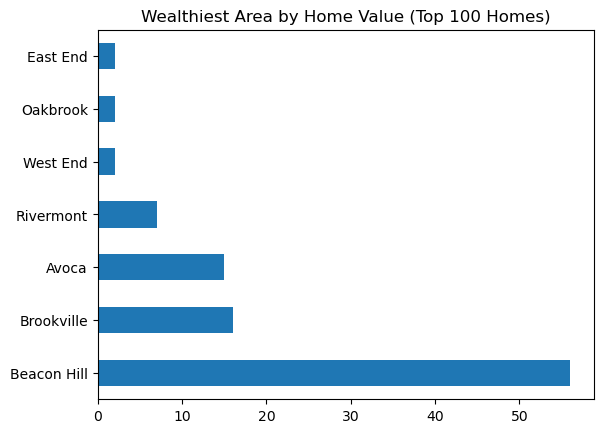

In [2]:
%run Task1.ipynb

### <b>Numeric Analysis:</b> How Size (Square Footage) of a House Relates to its Price


In [3]:
df_price = df['Price']
df_size = df['Size']

df_price_size = pd.concat([df_price, df_size], axis=1)

df_price_size


,Price,Size
0,638740.0,1849.0
1,546330.0,1551.0
2,527512.0,1696.0
3,376039.0,1073.0
4,576354.0,2054.0
...,...,...
945,511688.0,1390.0
946,468401.0,1614.0
947,228647.0,887.0
948,410983.0,1453.0


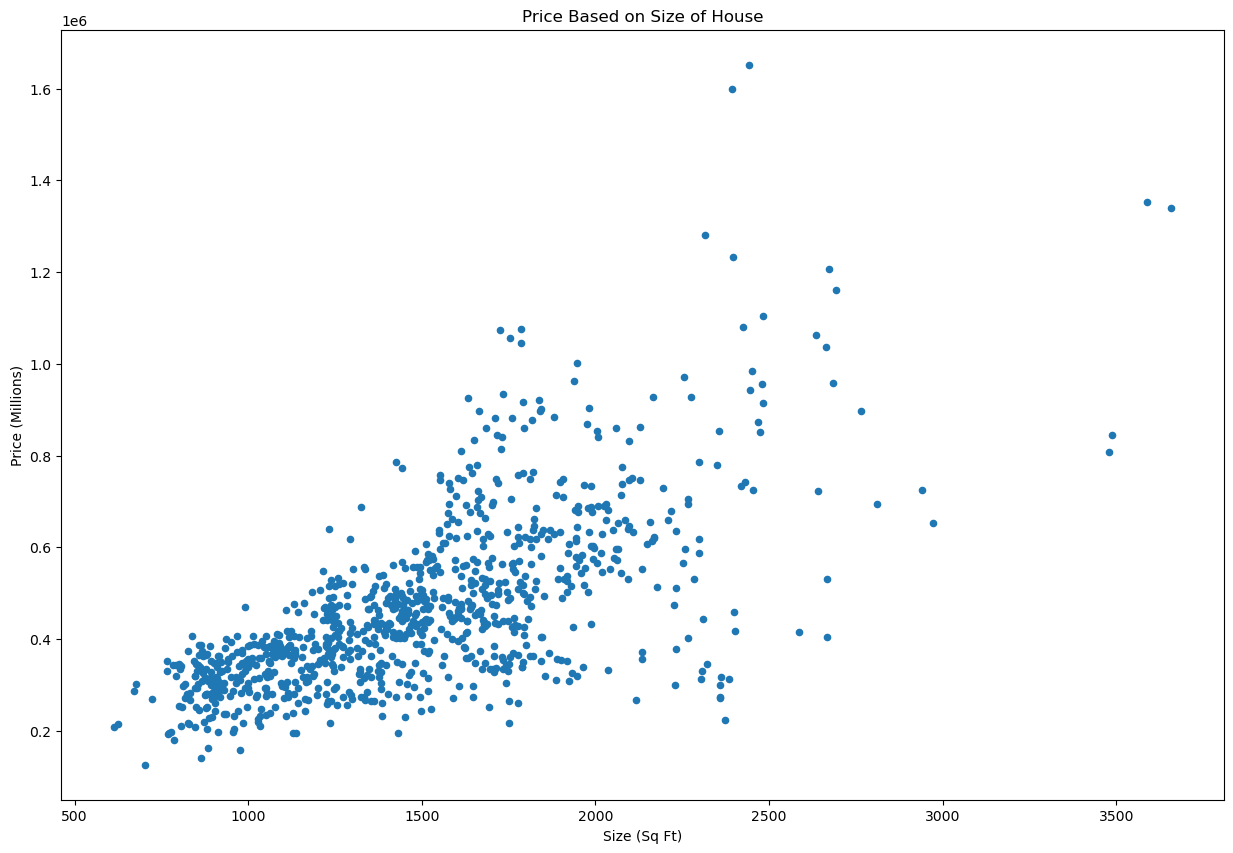

In [4]:
ax1 = df_price_size.plot.scatter(x='Size', y='Price', figsize=(15,10), title='Price Based on Size of House', xlabel='Size (Sq Ft)', ylabel='Price (Millions)')

#### <b>Does a larger house mean a higher price?</b>

The scatter plot above shows a correlation between larger houses and higher home values. The majority of houses are on the lower range of size and are similar in the lower range of price. The higher-end houses in size, are also on the higher-end of price. 

### <b>Numeric Analysis:</b> How The Age (Year Built) of a House Relates to its Price

In [5]:
df_yearbuilt = df['Year Built']

df_price_age = pd.concat([df_price, df_yearbuilt], axis=1)

df_price_age

,Price,Year Built
0,638740.0,2011
1,546330.0,2009
2,527512.0,2006
3,376039.0,1963
4,576354.0,2009
...,...,...
945,511688.0,2005
946,468401.0,2000
947,228647.0,1946
948,410983.0,1968


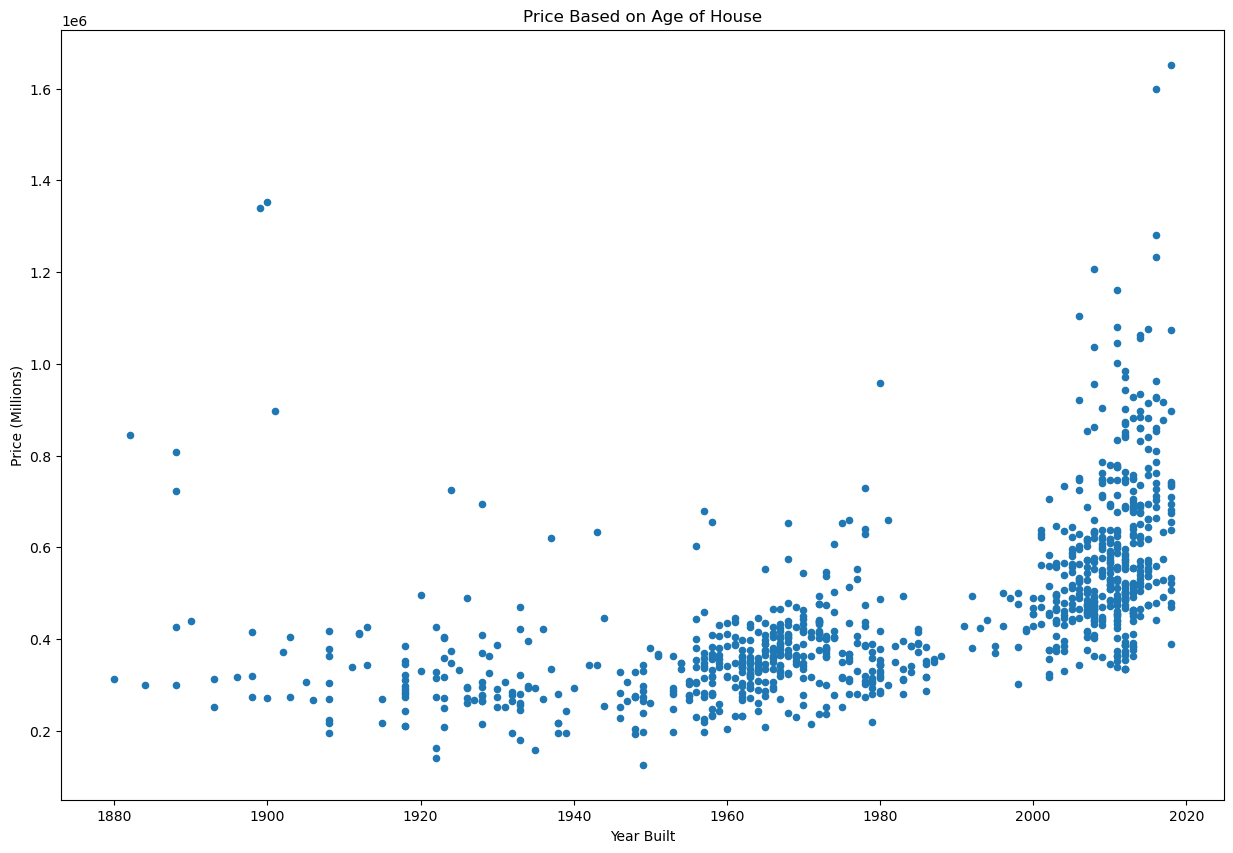

In [6]:
ax2 = df_price_age.plot.scatter(x='Year Built', y='Price', figsize=(15,10), title='Price Based on Age of House', xlabel='Year Built', ylabel='Price (Millions)')

#### <b>Does a newer house sell for more?</b>

Generally, there does not appear to be a direct correlation with the year a house was built, and the price it is sold for. This is likely due to rennovations and society's natural urge to pay more for older items of value that are well kept. 

### <b>Categorical Feature Analysis:</b> How Type of a House Relates to its Price

In [7]:
df_type = df['Type']

df_price_type = pd.concat([df_price, df_type], axis=1)

df_price_type

,Price,Type
0,638740.0,Detached
1,546330.0,Detached
2,527512.0,Detached
3,376039.0,Terraced
4,576354.0,Detached
...,...,...
945,511688.0,Semi-Detached
946,468401.0,Detached
947,228647.0,Bunaglow
948,410983.0,Detached


In [8]:
#Find average of Detached
mask_detached = df_price_type['Type'].isin(['Detached'])

df_prices_detached = df_price_type[mask_detached]

int(df_prices_detached['Price'].mean())

500138

In [9]:
#Find Avaerage of Bungalow
mask_bunaglow = df_price_type['Type'].isin(['Bunaglow'])

df_prices_bunaglow = df_price_type[mask_bunaglow]

int(df_prices_bunaglow['Price'].mean())

243483

In [10]:
#Find Average of Semi-Detached
mask_semi = df_price_type['Type'].isin(['Semi-Detached'])

df_prices_semi = df_price_type[mask_semi]

int(df_prices_semi['Price'].mean())

489152

In [11]:
#Find Average of End of Terrace
mask_end = df_price_type['Type'].isin(['End-of-Terrace'])

df_prices_end = df_price_type[mask_end]

int(df_prices_end['Price'].mean())

455991

In [12]:
#Find Average of Terraced
mask_terrace = df_price_type['Type'].isin(['Terraced'])

df_prices_terrace = df_price_type[mask_terrace]

int(df_prices_terrace['Price'].mean())

318313

In [13]:
#Find Average of Duplex
mask_duplex = df_price_type['Type'].isin(['Duplex'])

df_prices_duplex = df_price_type[mask_duplex]

int(df_prices_duplex['Price'].mean())

322540

In [14]:
#Construct dataframe of all averages
type_list = ['Detached', 'Bunaglow', 'Semi-Detached', 'End-of-Terrace', 'Terraced', 'Duplex']
type_means = []

type_means.append(int(df_prices_detached['Price'].mean()))
type_means.append(int(df_prices_bunaglow['Price'].mean()))
type_means.append(int(df_prices_semi['Price'].mean()))
type_means.append(int(df_prices_end['Price'].mean()))
type_means.append(int(df_prices_terrace['Price'].mean()))
type_means.append(int(df_prices_duplex['Price'].mean()))

df_type_means = pd.DataFrame(
    {'Type': type_list,
     'Average Sale Price': type_means
    })

df_type_means.sort_values(by='Average Sale Price', ascending=False)

,Type,Average Sale Price
0,Detached,500138
2,Semi-Detached,489152
3,End-of-Terrace,455991
5,Duplex,322540
4,Terraced,318313
1,Bunaglow,243483


<AxesSubplot:>

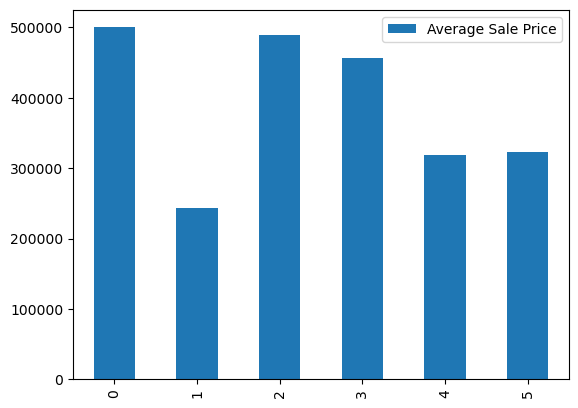

In [15]:
#Plot of averages
df_type_means.plot(kind="bar")

#### <b>Does a certain type of house make a house sell for more?</b>

In general, homes that are either Detached or Semi-Detached appear to be selling for the highest. End-of-Terrace homes aren't far off the average of detached/semi-detcahed, but Duplex, Terraced, and Bunaglow appear to be the lower-end priced homes. 



### <b>Categorical Feature Analysis:</b> How Style of a House Relates to its Price

In [16]:
df_style = df['# of Stories']

df_price_style = pd.concat([df_price, df_style], axis=1)

df_price_style

,Price,# of Stories
0,638740.0,2.0
1,546330.0,1.0
2,527512.0,2.0
3,376039.0,1.0
4,576354.0,2.0
...,...,...
945,511688.0,1.0
946,468401.0,2.0
947,228647.0,1.0
948,410983.0,1.0


In [17]:
#Find Average of 1 Storey Houses
mask_1s = df_price_style['# of Stories'].isin([1.0])

df_prices_1storey = df_price_style[mask_1s]

int(df_prices_1storey['Price'].mean())

430677

In [18]:
#Find Average of 1.5 Storey Houses
mask_15s = df_price_style['# of Stories'].isin([1.5])

df_prices_15storey = df_price_style[mask_15s]

int(df_prices_15storey['Price'].mean())

417955

In [19]:
#Find Average of 2 Storey Houses
mask_2s = df_price_style['# of Stories'].isin([2.0])

df_prices_2storey = df_price_style[mask_2s]

int(df_prices_2storey['Price'].mean())

532503

In [20]:
#Construct Dataframe of All Averages
storey_list = ['1 Storey', '1.5 Stories', '2 Stories']
storey_means = []

storey_means.append(int(df_prices_1storey['Price'].mean()))
storey_means.append(int(df_prices_15storey['Price'].mean()))
storey_means.append(int(df_prices_2storey['Price'].mean()))

df_storey_means = pd.DataFrame(
    {'Stories': storey_list,
     'Average Sale Price': storey_means
    })

df_storey_means.sort_values(by='Average Sale Price', ascending=False)

,Stories,Average Sale Price
2,2 Stories,532503
0,1 Storey,430677
1,1.5 Stories,417955


<AxesSubplot:>

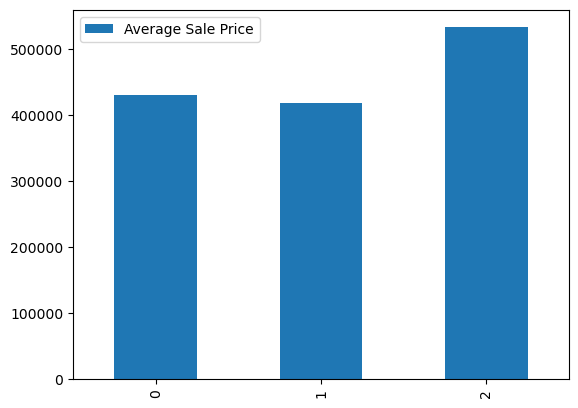

In [21]:
#Plot Averages
df_storey_means.plot(kind="bar")

#### <b>Does one style house sell for more than the others?</b>

Despite 2-Storey selling for the most money, 1.5 storey's average is less than that of 1 storey, so there is not a correlation between style of house (# of stories) and how high a house sells for. 

### <b>Categorical Feature Analysis:</b> How the Number of Bedrooms of a House Relates to its Price

In [22]:
df_bed = df['Bedrooms']

df_price_beds = pd.concat([df_price, df_bed], axis=1)

df_price_beds

,Price,Bedrooms
0,638740.0,3
1,546330.0,3
2,527512.0,3
3,376039.0,3
4,576354.0,3
...,...,...
945,511688.0,2
946,468401.0,3
947,228647.0,2
948,410983.0,3


In [23]:
#Average of 1 Bedroom
mask_1bed = df_price_beds['Bedrooms'].isin([1])

df_prices_1bed = df_price_beds[mask_1bed]

int(df_prices_1bed['Price'].mean())

415120

In [24]:
#Average of 2 Bedroom
mask_2bed = df_price_beds['Bedrooms'].isin([2])

df_prices_2bed = df_price_beds[mask_2bed]

int(df_prices_2bed['Price'].mean())

392867

In [25]:
#Average of 3 Bedroom
mask_3bed = df_price_beds['Bedrooms'].isin([3])

df_prices_3bed = df_price_beds[mask_3bed]

int(df_prices_3bed['Price'].mean())

486448

In [26]:
#Average of 4 Bedroom
mask_4bed = df_price_beds['Bedrooms'].isin([4])

df_prices_4bed = df_price_beds[mask_4bed]

int(df_prices_4bed['Price'].mean())

498690

In [27]:
#Average of 5 Bedroom
mask_5bed = df_price_beds['Bedrooms'].isin([5])

df_prices_5bed = df_price_beds[mask_5bed]

int(df_prices_5bed['Price'].mean())

497694

In [28]:
#Construct Dataframe of All Averages
bed_list = ['1 Bed', '2 Bed', '3 Bed', '4 Bed', '5 Bed']
bed_means = []

bed_means.append(int(df_prices_1bed['Price'].mean()))
bed_means.append(int(df_prices_2bed['Price'].mean()))
bed_means.append(int(df_prices_3bed['Price'].mean()))
bed_means.append(int(df_prices_4bed['Price'].mean()))
bed_means.append(int(df_prices_5bed['Price'].mean()))

df_bed_means = pd.DataFrame(
    {'Beds': bed_list,
     'Average Sale Price': bed_means
    })

df_bed_means.sort_values(by='Average Sale Price', ascending=False)

,Beds,Average Sale Price
3,4 Bed,498690
4,5 Bed,497694
2,3 Bed,486448
0,1 Bed,415120
1,2 Bed,392867


<AxesSubplot:>

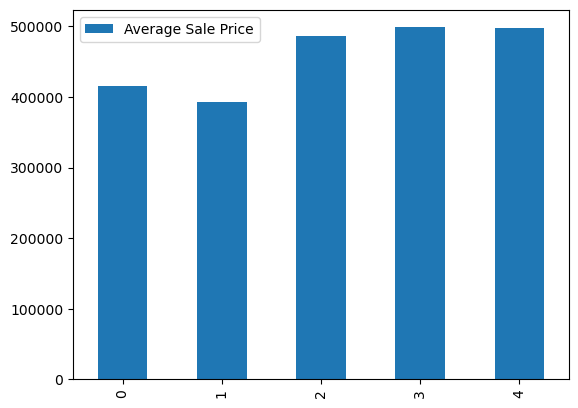

In [29]:
#Plot Averages
df_bed_means.plot(kind="bar")

#### <b>Is there a correlation between number of bedrooms and how high a house sells for?</b>

Considering that 2-Bedroom and 5-bedroom home's averages are both less than one below, there appears to be no correlation between more bedrooms and a higher sale price for a house. 

### <b>Categorical Feature Analysis:</b> How the Number of Bathrooms of a House Relates to its Price

In [30]:
df_bath = df['Bathrooms']

df_price_baths = pd.concat([df_price, df_bath], axis=1)

df_price_baths

,Price,Bathrooms
0,638740.0,2
1,546330.0,2
2,527512.0,2
3,376039.0,1
4,576354.0,2
...,...,...
945,511688.0,2
946,468401.0,2
947,228647.0,1
948,410983.0,2


In [31]:
#Average of 1 Bathroom
mask_1bath = df_price_baths['Bathrooms'].isin([1])

df_prices_1bath = df_price_baths[mask_1bath]

int(df_prices_1bath['Price'].mean())

343088

In [32]:
#Average of 2 Bathroom
mask_2bath = df_price_baths['Bathrooms'].isin([2])

df_prices_2bath = df_price_baths[mask_2bath]

int(df_prices_2bath['Price'].mean())

551062

In [33]:
#Average 3 Bathroom
mask_3bath = df_price_baths['Bathrooms'].isin([3])

df_prices_3bath = df_price_baths[mask_3bath]

int(df_prices_3bath['Price'].mean())

697864

In [34]:
#Construct a dataframe of the averages 
bath_list = ['1 Bath', '2 Bath', '3 Bath']
bath_means = []

bath_means.append(int(df_prices_1bath['Price'].mean()))
bath_means.append(int(df_prices_2bath['Price'].mean()))
bath_means.append(int(df_prices_3bath['Price'].mean()))

df_bath_means = pd.DataFrame(
    {'Baths': bath_list,
     'Average Sale Price': bath_means
    })

df_bath_means.sort_values(by='Average Sale Price', ascending=False)

,Baths,Average Sale Price
2,3 Bath,697864
1,2 Bath,551062
0,1 Bath,343088


<AxesSubplot:>

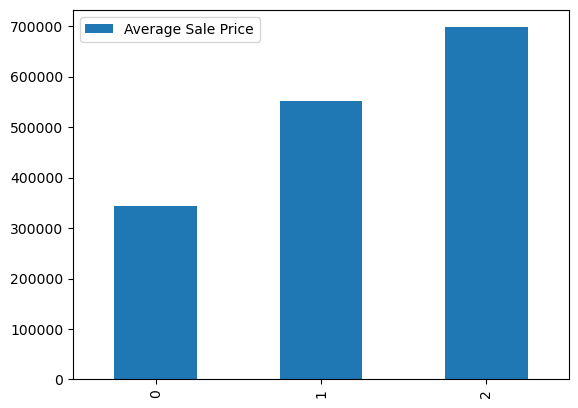

In [35]:
#Plot the average
df_bath_means.plot(kind="bar")

#### <b>Is there a correlation between number of bathrooms and how high a house sells for?</b>

Yes, there is definitely a correlation seen here. As bathrooms increase, average house sale price increases by over 100,000 euros. This is the strongest correlation we have seen so far. 

### <b>Simple Linear Regression Analysis</b> 

Text(0, 0.5, 'Price')

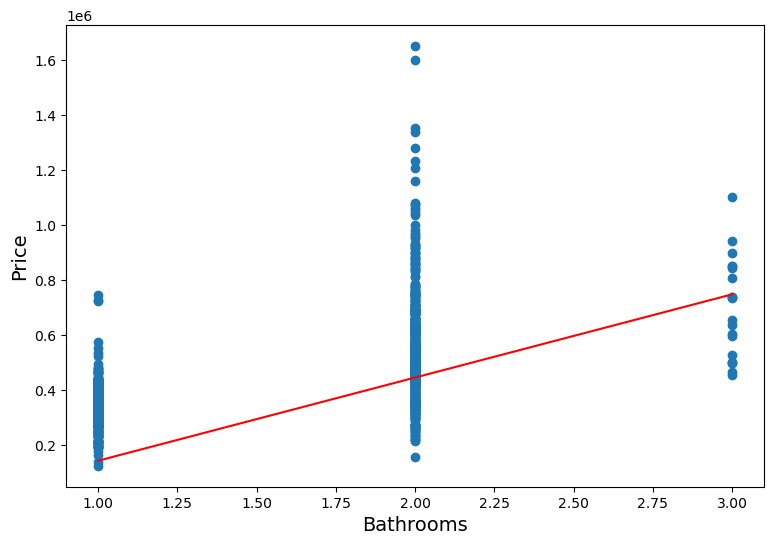

In [36]:
#Categorical Analysis Linear Regression #4: Bathrooms

import matplotlib.pyplot as plt
%matplotlib inline

x = df_price_baths[["Bathrooms"]].values
y = df_price_baths[["Price"]].values

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)

plt.figure(figsize=(9,6))
plt.scatter(x, y)
# plot the regression line
m = model.coef_[0]
b = model.intercept_
plt.plot([min(x), max(x)], [b, m*max(x) + b], 'r')
plt.xlabel('Bathrooms', fontsize=14)
plt.ylabel('Price', fontsize=14)

Text(0, 0.5, 'Year Built')

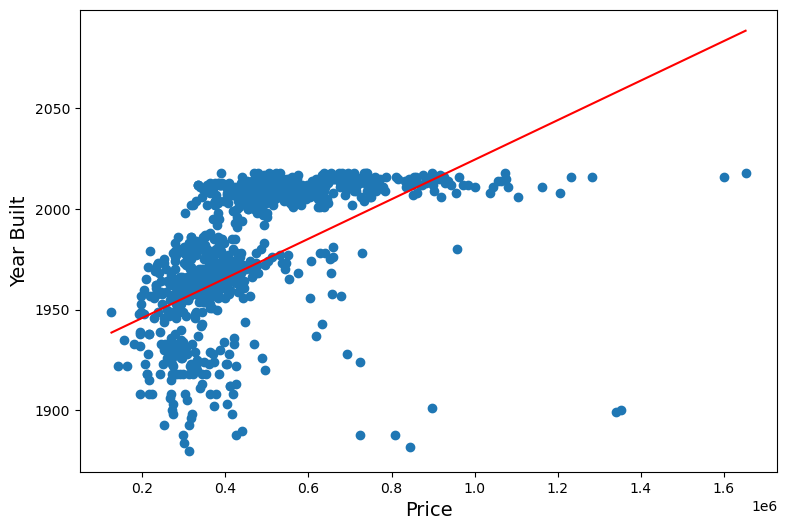

In [38]:
#Numeric Analysis #1 Linear Regression: Year Built
x = df_price_age[["Price"]].values
y = df_price_age[["Year Built"]].values

model = LinearRegression()
model.fit(x, y)

plt.figure(figsize=(9,6))
plt.scatter(x, y)
# plot the regression line
m = model.coef_[0]
b = model.intercept_
plt.plot([min(x), max(x)], [b, m*max(x) + b], 'r')
plt.xlabel('Price', fontsize=14)
plt.ylabel('Year Built', fontsize=14)

Text(0, 0.5, 'Size')

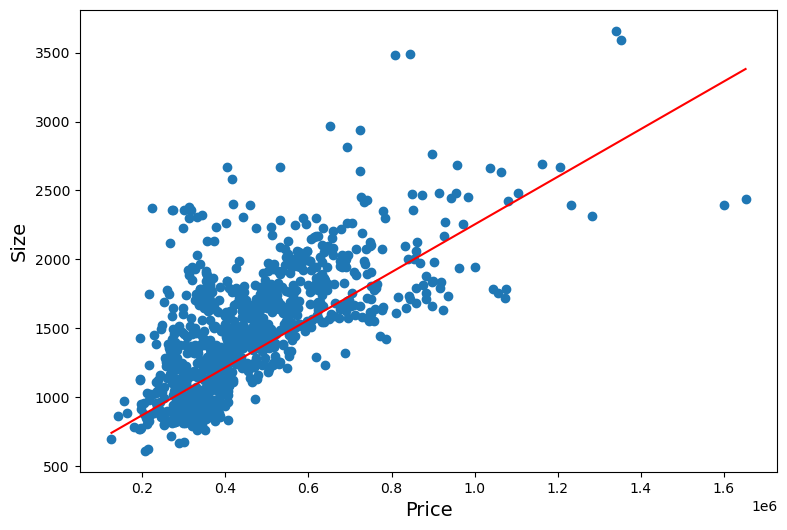

In [39]:
#Numeric Analysis #2 Linear Regression: Size

x = df_price_size[["Price"]].values
y = df_price_size[["Size"]].values

model = LinearRegression()
model.fit(x, y)

plt.figure(figsize=(9,6))
plt.scatter(x, y)
# plot the regression line
m = model.coef_[0]
b = model.intercept_
plt.plot([min(x), max(x)], [b, m*max(x) + b], 'r')
plt.xlabel('Price', fontsize=14)
plt.ylabel('Size', fontsize=14)

### <b>Discussion</b>

We have now examined 6 various representations of a categorical/numeric feature based on the sale price of a house. The strongest correlation between an increase in that feature and an increase in the overall price is suprisingly, the number of bathrooms a house has. 
<br>

<b>Price vs Size(Sq Ft):</b> Generally, as size goes up so does price. There are some values that negate this, but the majority fall in line. 
<br>
<b>Price vs Age(Year Built):</b> There are expensive homes that have been newly built as well as ones built in the previous centuries. Very little correlation is seen here. 
<br>
<b>Price vs Type:</b> Detached/Semi-Detached appear to be the most expensive, but other type's averages are not too far off. Some correlation is seen here. 
<br>
<b>Price vs Style(# of Stories):</b> No correlation as 1.5 storey's average is less than that of 1 storey. 
<br>
<b>Price vs # of Bedrooms:</b> Some to none correlation is seen here, some bathroom count average's go against the increase feature = increased price narrative.  
<b>Price vs # of Bathrooms:</b> High correlation is seen here. As number of bathrooms increases by 1, average house sale price increases by at least 100,000 EUR. 

#### Overall, the number one way to predict the price of a house is the # of bathrooms that house has. 